In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [51]:
price1 = pd.read_csv("price1.csv", sep=";")
price2 = pd.read_csv("price2.csv", sep=";")
price3 = pd.read_csv("price3.csv", sep=";")

In [52]:
price1 = price1.set_index("timestamp")
price2 = price2.set_index("timestamp")
price3 = price3.set_index("timestamp")

In [53]:
price2.index = price2.index + price1.index[-1] + 100
# to every
#  timestamp in price3, add the last timestamp in price2 +100
price3.index = price3.index + price2.index[-1] + 100

In [54]:
combined = pd.concat([price1, price2, price3])
#replaceNaN
combined = combined.fillna(0)

In [55]:
diving = combined[combined["product"] == "DIVING_GEAR"]
dolphins = combined[combined["product"] == "DOLPHIN_SIGHTINGS"]
diving["total_bid_volume"] = diving["bid_volume_1"] + diving["bid_volume_2"] + diving["bid_volume_3"]
diving["total_ask_volume"] = diving["ask_volume_1"] + diving["ask_volume_2"] + diving["ask_volume_3"]
diving["spread"] = diving["ask_price_1"] - diving["bid_price_1"]
#for dolphin sightings, remove everything except timestamp, product, and mid_pirce
dolphins = dolphins[["product", "mid_price"]]
diving.head(50)

C:\Users\jean\AppData\Local\Temp\ipykernel_19152\2105672330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diving["total_bid_volume"] = diving["bid_volume_1"] + diving["bid_volume_2"] + diving["bid_volume_3"]
C:\Users\jean\AppData\Local\Temp\ipykernel_19152\2105672330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diving["total_ask_volume"] = diving["ask_volume_1"] + diving["ask_volume_2"] + diving["ask_volume_3"]
C:\Users\jean\AppData\Local\Temp\ipykernel_19152\2105672330.py:5: SettingWithCopyWar

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,total_bid_volume,total_ask_volume,spread
timestamp,,,,,,,,,,,,,,,,,,,
0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,0.0,0.0,100001.0,6.0,100002.0,19.0,0.0,0.0,100000.0,0.000000,25.0,25.0,2.0
100,0,DIVING_GEAR,99999.0,5.0,99998.0,12.0,0.0,0.0,100001.0,5.0,100002.0,12.0,0.0,0.0,100000.0,0.000000,17.0,17.0,2.0
200,0,DIVING_GEAR,100002.0,2.0,100001.0,10.0,100000.0,14.0,100003.0,10.0,100004.0,14.0,0.0,0.0,100002.5,-2.875000,26.0,24.0,1.0
300,0,DIVING_GEAR,99999.0,9.0,99998.0,11.0,0.0,0.0,100001.0,9.0,100002.0,11.0,0.0,0.0,100000.0,-1.140625,20.0,20.0,2.0
400,0,DIVING_GEAR,99993.0,19.0,0.0,0.0,0.0,0.0,99996.0,19.0,0.0,0.0,0.0,0.0,99994.5,4.484375,19.0,19.0,3.0
500,0,DIVING_GEAR,99990.0,22.0,0.0,0.0,0.0,0.0,99993.0,22.0,0.0,0.0,0.0,0.0,99991.5,7.351562,22.0,22.0,3.0
600,0,DIVING_GEAR,99984.0,22.0,0.0,0.0,0.0,0.0,99987.0,22.0,0.0,0.0,0.0,0.0,99985.5,13.609375,22.0,22.0,3.0
700,0,DIVING_GEAR,99985.0,5.0,99984.0,16.0,0.0,0.0,99987.0,5.0,99988.0,16.0,0.0,0.0,99986.0,13.234375,21.0,21.0,2.0
800,0,DIVING_GEAR,99993.0,5.0,99992.0,10.0,0.0,0.0,99995.0,5.0,99996.0,10.0,0.0,0.0,99994.0,4.804688,15.0,15.0,2.0


In [56]:
dolphins.head(10)

,product,mid_price
timestamp,,
0,DOLPHIN_SIGHTINGS,3000.0
100,DOLPHIN_SIGHTINGS,3000.0
200,DOLPHIN_SIGHTINGS,2999.0
300,DOLPHIN_SIGHTINGS,2999.0
400,DOLPHIN_SIGHTINGS,2999.0
500,DOLPHIN_SIGHTINGS,3000.0
600,DOLPHIN_SIGHTINGS,3000.0
700,DOLPHIN_SIGHTINGS,3000.0
800,DOLPHIN_SIGHTINGS,2999.0


In [ ]:
#make each the 100:200 terms
diving = diving[100:200]
dolphins = dolphins[100:200]

Text(0.5, 1.0, 'Spread')

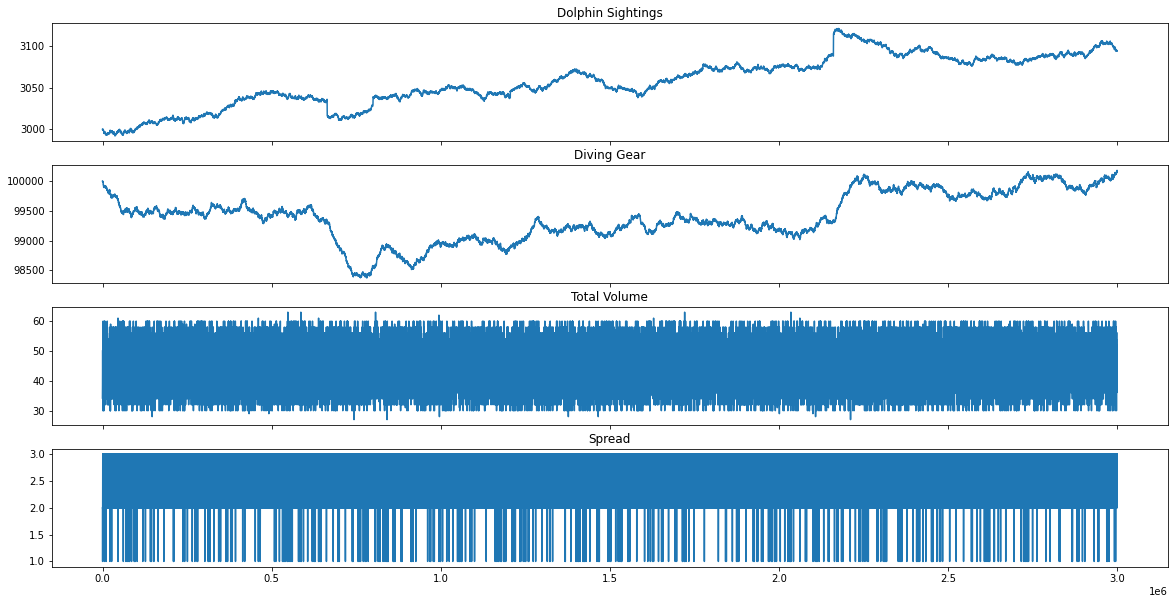

In [58]:
#in vertically stacked plots, show dolphins mid price, diving mid price, diving total volume, and diving spread
fig, ax = plt.subplots(4, 1, sharex=True)
ax[0].plot(dolphins.index, dolphins["mid_price"])
ax[0].set_title("Dolphin Sightings")
ax[1].plot(diving.index, diving["mid_price"])
ax[1].set_title("Diving Gear")
ax[2].plot(diving.index, diving["total_bid_volume"] + diving["total_ask_volume"])
ax[2].set_title("Total Volume")
ax[3].plot(diving.index, diving["spread"])
ax[3].set_title("Spread")



